# Introduction to Seaborn

* seaborn 是 build 在 matplotlib 上，和 pandas 合作的很好

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Scatter plot

### Data

#### student_data

In [2]:
student_data = pd.read_csv("data/student-alcohol-consumption.csv", index_col=0)
student_data

,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,schoolsup,...,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,GP,F,18,GT3,A,4,4,2,0,yes,...,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,GP,F,17,GT3,T,1,1,1,0,no,...,3,1,1,3,4,5,5,6,Urban,2 to 5 hours
2,GP,F,15,LE3,T,1,1,1,3,yes,...,2,2,3,3,10,7,8,10,Urban,2 to 5 hours
3,GP,F,15,GT3,T,4,2,1,0,no,...,2,1,1,5,2,15,14,15,Urban,5 to 10 hours
4,GP,F,16,GT3,T,3,3,1,0,no,...,2,1,2,5,4,6,10,10,Urban,2 to 5 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,LE3,A,2,2,1,2,no,...,4,4,5,4,11,9,9,9,Urban,2 to 5 hours
391,MS,M,17,LE3,T,3,1,2,0,no,...,5,3,4,2,3,14,16,16,Urban,<2 hours
392,MS,M,21,GT3,T,1,1,1,3,no,...,3,3,3,3,3,10,8,7,Rural,<2 hours
393,MS,M,18,LE3,T,3,2,3,0,no,...,1,3,4,5,0,11,12,10,Rural,<2 hours


#### mpg

In [3]:
mpg = pd.read_csv("data/mpg.csv")
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


### 基本 scatter plot

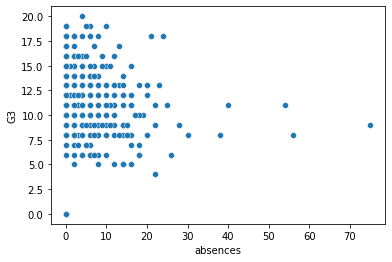

In [4]:
sns.scatterplot(x="absences", y="G3", 
                data=student_data);

* G3 是 第三次段考的意思。可以看到，缺席率越高，看起來成績越低

### hue (i.e. color)

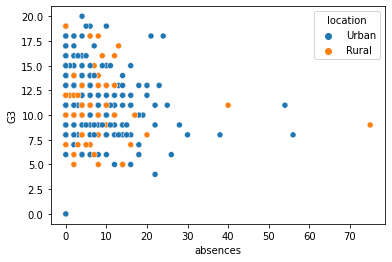

In [5]:
sns.scatterplot(x="absences", y="G3", 
                data=student_data, 
                hue="location");

* 可以看到，第三軸放上 location 後，結論是：不論是城市或鄉下的小孩，都是缺席越多，成績越差

#### 第三個變數的顏色自己指定

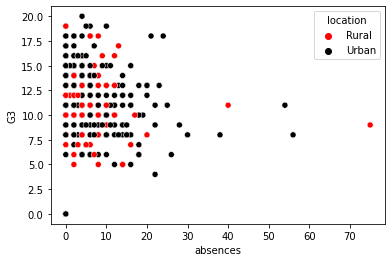

In [6]:
hue_colors = {
    "Urban": "black",
    "Rural": "red"
}
sns.scatterplot(x="absences", y="G3", 
                data=student_data, 
                hue="location",
                hue_order = ["Rural", "Urban"],
                palette = hue_colors);

#### 第三個變數的順序自己指定

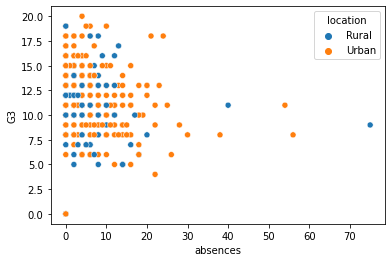

In [7]:
sns.scatterplot(x="absences", y="G3", 
                data=student_data, 
                hue="location",
                hue_order = ["Rural", "Urban"]); # 先 Rural 再 Urban

### size

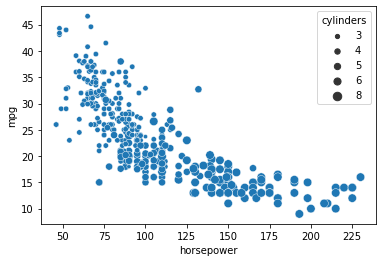

In [8]:
sns.scatterplot(
    x="horsepower", 
    y="mpg",
    data=mpg,
    size="cylinders"
);

* 可以看到，汽缸數越多(cylinders)，horsepower越大，而油耗越差(mpg)

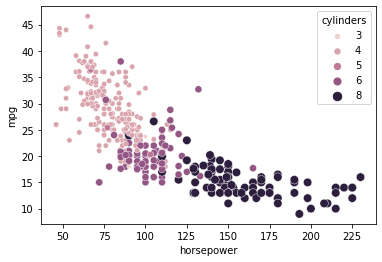

In [9]:
sns.scatterplot(
    x="horsepower", 
    y="mpg",
    data=mpg,
    size="cylinders",
    hue = "cylinders"
);

* 加上顏色，看得更清楚
* 也因為 cylinders 被他認為是 float 變數，所以當第三軸的顏色時，他是給你 gradient 顏色，比較好觀察

### style (點的style)

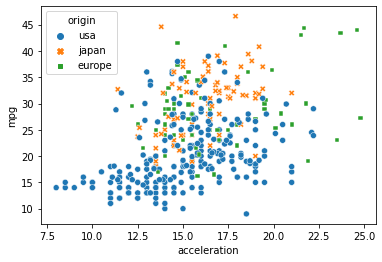

In [10]:
sns.scatterplot(
    x="acceleration", 
    y="mpg",
    data=mpg,
    style ="origin",
    hue = "origin"
);

* 可以看到，usa的車子最多，而且比起 japan 和 europe 的特色，是他有一部分都聚在左下角：表示加速快 & 油耗差

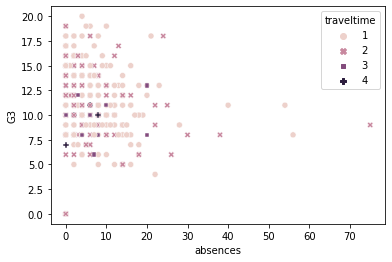

In [11]:
sns.scatterplot(
    x = "absences",
    y = "G3",
    data = student_data,
    style = "traveltime",
    hue = "traveltime"
);

### alpha

### facet_grid 類型

* ggplot 的 facet_grid/facet_wrap，在 sns 中，是用 `relplot()` 來實現
* relplot 是 relational plot 的縮寫，它包含 scatter plot 和 line plot. 
* 我們使用 relplot 的時機是，你想做出 ggplot 那種 facet_wrap 的效果

#### by column 畫圖

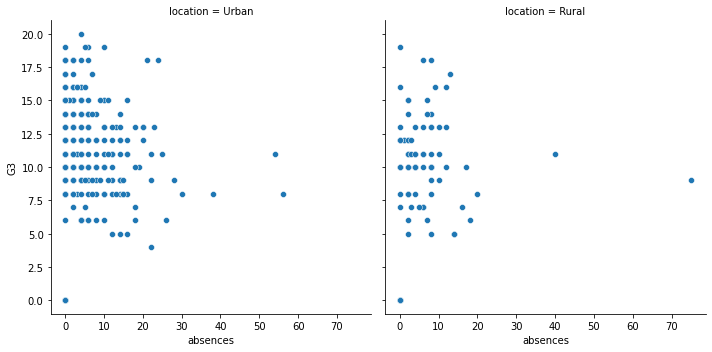

In [12]:
sns.relplot(x="absences", 
            y="G3",
            data=student_data, 
            kind = "scatter",
            col = "location");

#### by column 指定順序

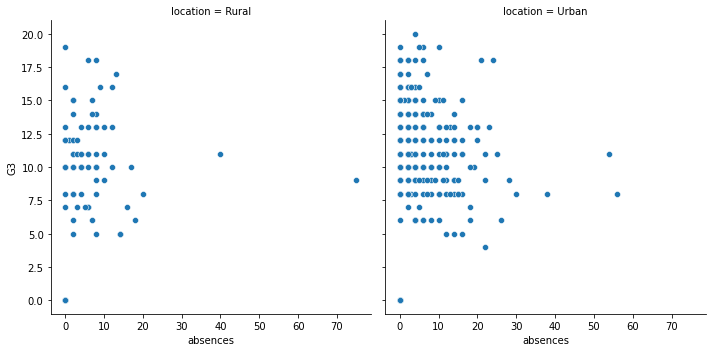

In [13]:
sns.relplot(x="absences", 
            y="G3",
            data=student_data, 
            kind = "scatter",
            col = "location",
           col_order = ["Rural", "Urban"]);

#### 指定 column 行數

* 可以定義 by col 畫圖時，最多幾個後要換行

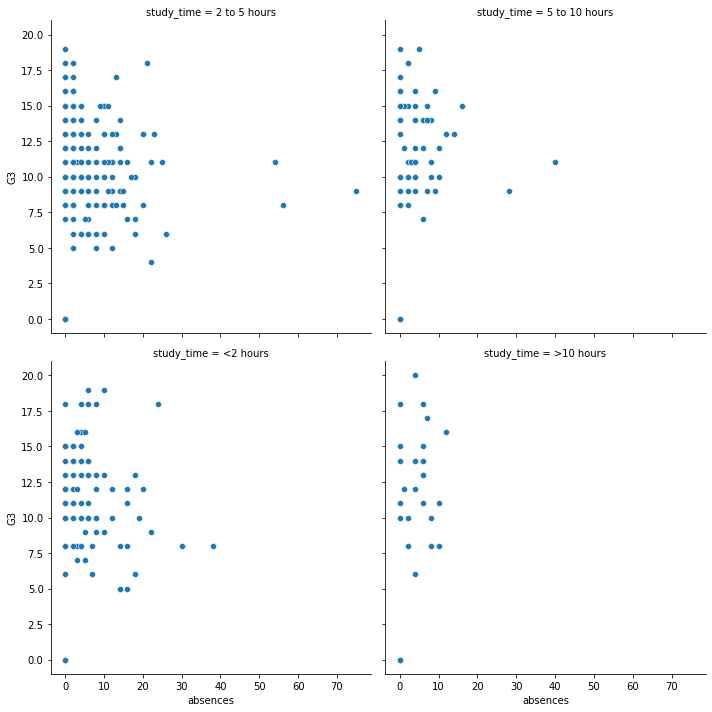

In [14]:
sns.relplot(x="absences", 
            y="G3",
            data=student_data, 
            kind = "scatter",
            col = "study_time",
            col_wrap = 2);

#### by row 畫圖

* 同樣的做法，可以改成 by row

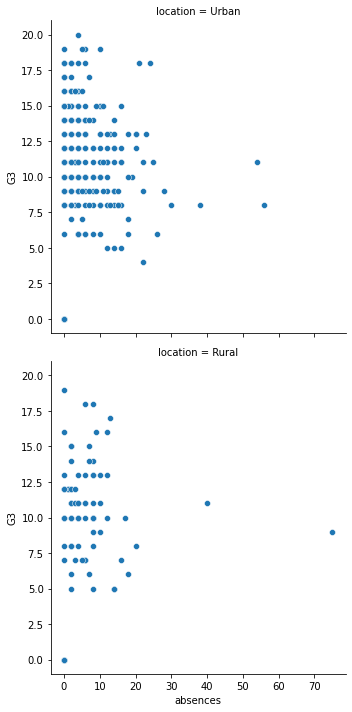

In [15]:
sns.relplot(x="absences", 
            y="G3",
            data=student_data, 
            kind = "scatter",
            row = "location");

#### by column & row (R 的 facet_grid)

* 如果要做到 facet_grid (兩個變數交叉)，那就又 col 又 row

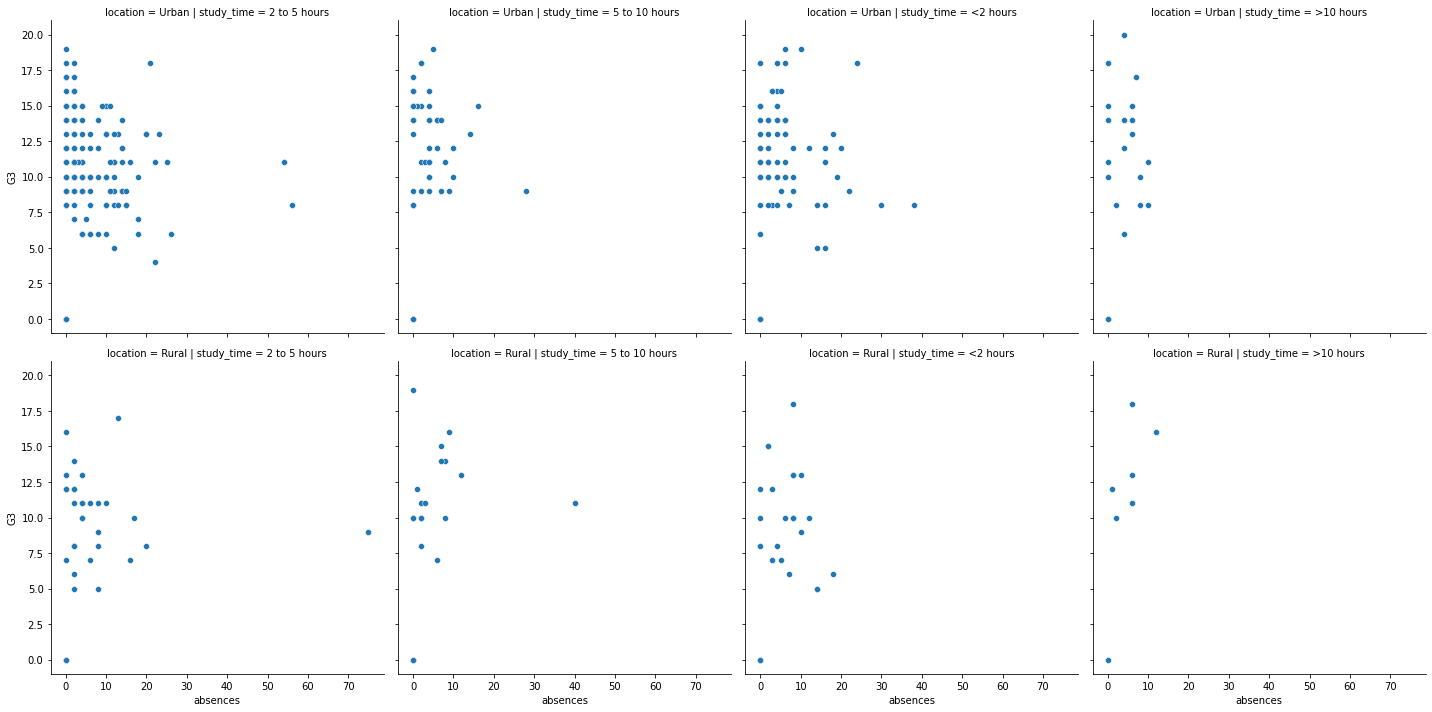

In [16]:
sns.relplot(x="absences", 
            y="G3",
            data=student_data, 
            kind = "scatter",
            col = "study_time",
           row = "location");

* 當然，剛剛 row 和 column 用過的細節設定都還是可以下：

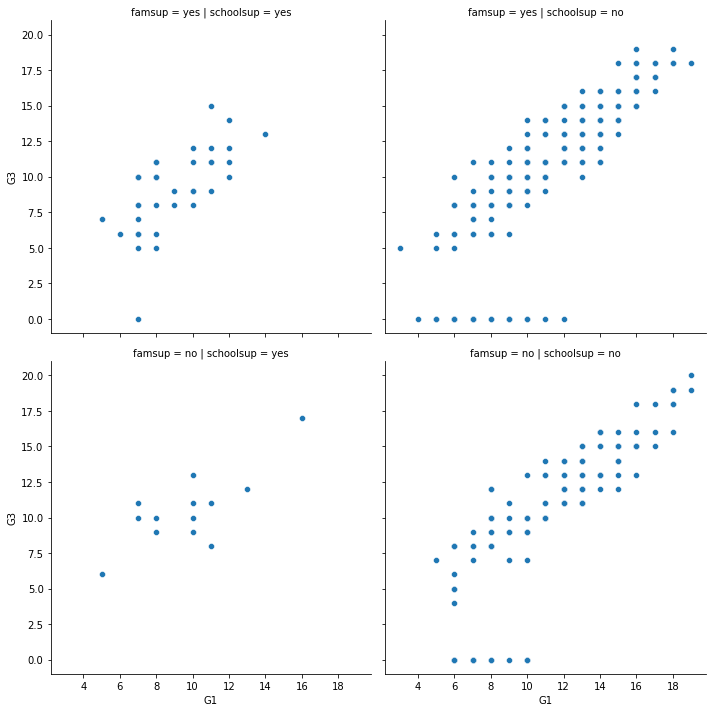

In [17]:
sns.relplot(x="G1", y="G3", # 第一學期 和 第三學期 的成績
            data=student_data,
            kind="scatter", 
            col="schoolsup", # 有沒有獲得學校補助 school support
            col_order=["yes", "no"],
            row = "famsup", # 有沒有獲得家庭補助 family support
            row_order = ["yes", "no"])

## Line plot

### 基本 line plot

### multiple line plot

### line plot with CI

## count plots (bar chart)

### 基本 countplot

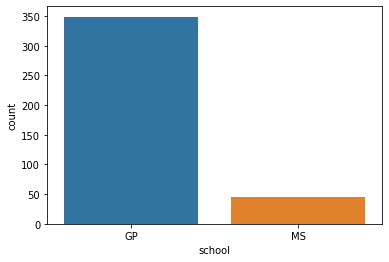

In [19]:
sns.countplot(x = "school", 
              data = student_data);

### 兩維的 countplot

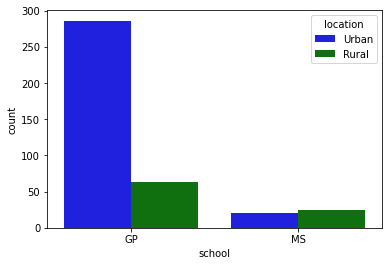

In [20]:
palette_colors = {"Rural": "green", "Urban": "blue"}

sns.countplot(x = "school", 
              data = student_data, 
              hue = "location", 
              palette = palette_colors);

In [22]:
countries = pd.read_csv("data/countries-of-the-world.csv")
countries

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [9]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

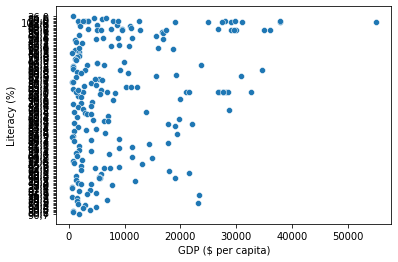

In [23]:
sns.scatterplot(x = "GDP ($ per capita)", y = "Literacy (%)", data = countries);

## count plot